In [33]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("C:/Users/marcio/Documents/results_Ian/20191121_1454_iCab_L_C.avi.csv")

df = df.set_index(['frame_number'])

df["take"] = None
the_second=False
for quadrant in [0,1,2,3]:
    set_number = 1
    list_frames = list(df[df["quadrant"] == quadrant].index.values) 
    for idx, value in enumerate(list_frames):
        if idx > 0:
            the_value = df.loc[(df.index==value) & (df.quadrant == quadrant), 'fish_id'].iloc[0]
            previous_value = df.loc[(df.index==list_frames[idx-1]) & (df.quadrant == quadrant), 'fish_id'].iloc[0]
                        
            if the_value.isnumeric() and previous_value.isnumeric():
                df.loc[(df.index==value) & (df.quadrant == quadrant), "take"] = set_number
                
            elif not the_value.isnumeric() and (previous_value.isnumeric()):
                set_number+=1
                        
            elif the_value.isnumeric() and not (previous_value.isnumeric()):
                df.loc[(df.index==value) & (df.quadrant == quadrant), "take"] = set_number
    


In [34]:
df_filtered = df[(df['take'].notnull())]


In [35]:
df_filtered["angle"] = np.NAN


In [36]:
import ast
df_filtered['fish_head'] = df_filtered['fish_head'].apply(ast.literal_eval)
df_filtered['fish_tail'] = df_filtered['fish_tail'].apply(ast.literal_eval)
df_filtered['fish_id'] = df_filtered['fish_id'].apply(ast.literal_eval)
df_filtered['tail_points'] = df_filtered['tail_points'].apply(ast.literal_eval)
df_filtered['quad_coord'] = df_filtered['quad_coord'].apply(ast.literal_eval)






In [37]:
df_filtered["angle"] = df_filtered.apply(lambda x: (x.fish_head, x.tail_points[1]), axis=1)


In [38]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle
frame_number,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))"
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))"
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))"
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))"
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))"
...,...,...,...,...,...,...,...,...,...,...,...
2502,22.022716,"(347, 563)","(349, 610)","(346, 541)",0,604.5,1,"[(554, 347), (568, 349), (582, 349), (596, 349...","(0, 430, 414, 440)",1,"((346, 541), (568, 349))"
2502,12.206556,"(203, 399)","(229, 381)","(193, 406)",3,266.0,1,"[(400, 201), (397, 208), (391, 215), (386, 222...","(0, 0, 416, 409)",2,"((193, 406), (397, 208))"
2502,16.492423,"(300, 216)","(264, 220)","(316, 212)",3,356.5,2,"[(213, 311), (216, 300), (219, 288), (221, 276...","(0, 0, 416, 409)",2,"((316, 212), (216, 300))"


In [39]:
df_filtered["rotation"] = np.NAN

In [40]:
import math

def calc_rotation(angle):
    x = angle[0][0] - angle[1][1]   #must invert, as squeleton points is y,x
    
    y = angle[0][1] - angle[1][0]   #must invert, as squeleton points is y,x
   
    dual_degree = math.atan2(y*-1, x) * 180 / np.pi
    
                  
      
    

    return dual_degree


df_filtered["rotation"] = df_filtered["angle"].apply(calc_rotation)


In [41]:
df_filtered['abs_rotation'] = abs(df_filtered['rotation'])
df_filtered
#df_filtered['Btime'].iloc[0]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation
frame_number,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,22.022716,"(347, 563)","(349, 610)","(346, 541)",0,604.5,1,"[(554, 347), (568, 349), (582, 349), (596, 349...","(0, 430, 414, 440)",1,"((346, 541), (568, 349))",96.340192,96.340192
2502,12.206556,"(203, 399)","(229, 381)","(193, 406)",3,266.0,1,"[(400, 201), (397, 208), (391, 215), (386, 222...","(0, 0, 416, 409)",2,"((193, 406), (397, 208))",-149.036243,149.036243
2502,16.492423,"(300, 216)","(264, 220)","(316, 212)",3,356.5,2,"[(213, 311), (216, 300), (219, 288), (221, 276...","(0, 0, 416, 409)",2,"((316, 212), (216, 300))",14.036243,14.036243


In [42]:
df_filtered['diff'] = df_filtered.groupby(["quadrant", "fish_id"])['abs_rotation'].diff() #abs(df_filtered['abs_rotation'] - df_filtered['abs_rotation'].shift(1))



In [43]:
df_filtered.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff
frame_number,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132
1263,17.720045,"(643, 468)","(607, 458)","(660, 473)",1,352.0,2,"[(472, 656), (468, 644), (464, 632), (461, 620...","(440, 426, 408, 444)",1,"((660, 473), (468, 644))",-17.354025,17.354025,-2.086010
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000
1264,18.027756,"(646, 468)","(610, 457)","(663, 474)",1,348.5,2,"[(472, 658), (468, 646), (465, 634), (461, 622...","(440, 426, 408, 444)",1,"((663, 474), (468, 646))",-19.440035,19.440035,2.086010
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326


<AxesSubplot:>

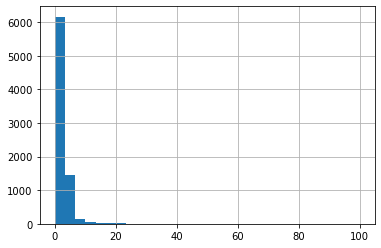

In [44]:
df_filtered[df_filtered["diff"] < 5]["diff"].abs().hist(bins = 30)

In [45]:
df_filtered["displace"] = np.NAN

for quadrant in [0,1,2,3]:
    for fish_ident in [1,2]:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 0:
                    
                               
                    the_value = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]
                    previous_value = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]           
                                        
                    df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'displace'] = ((the_value[0] - previous_value[0])**2 \
                    + (the_value[1] - previous_value[1])**2)**0.5
                            
                    
      
        
       
                


    


    



In [46]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace
frame_number,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618,3.162278
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,22.022716,"(347, 563)","(349, 610)","(346, 541)",0,604.5,1,"[(554, 347), (568, 349), (582, 349), (596, 349...","(0, 430, 414, 440)",1,"((346, 541), (568, 349))",96.340192,96.340192,3.900494,1.000000
2502,12.206556,"(203, 399)","(229, 381)","(193, 406)",3,266.0,1,"[(400, 201), (397, 208), (391, 215), (386, 222...","(0, 0, 416, 409)",2,"((193, 406), (397, 208))",-149.036243,149.036243,0.899860,1.000000
2502,16.492423,"(300, 216)","(264, 220)","(316, 212)",3,356.5,2,"[(213, 311), (216, 300), (219, 288), (221, 276...","(0, 0, 416, 409)",2,"((316, 212), (216, 300))",14.036243,14.036243,3.343376,5.385165


Calculate the predicted next position if fish would be swimming straight

<AxesSubplot:>

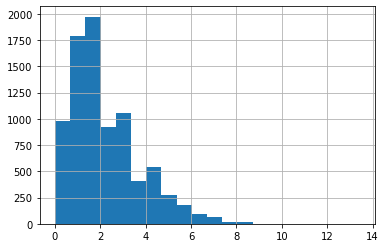

In [47]:
df_filtered["displace"].hist(bins=20)

In [48]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace
frame_number,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618,3.162278
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,22.022716,"(347, 563)","(349, 610)","(346, 541)",0,604.5,1,"[(554, 347), (568, 349), (582, 349), (596, 349...","(0, 430, 414, 440)",1,"((346, 541), (568, 349))",96.340192,96.340192,3.900494,1.000000
2502,12.206556,"(203, 399)","(229, 381)","(193, 406)",3,266.0,1,"[(400, 201), (397, 208), (391, 215), (386, 222...","(0, 0, 416, 409)",2,"((193, 406), (397, 208))",-149.036243,149.036243,0.899860,1.000000
2502,16.492423,"(300, 216)","(264, 220)","(316, 212)",3,356.5,2,"[(213, 311), (216, 300), (219, 288), (221, 276...","(0, 0, 416, 409)",2,"((316, 212), (216, 300))",14.036243,14.036243,3.343376,5.385165


In [49]:
df_filtered["next_predicted"] = None
from sklearn.linear_model import LinearRegression

def reg(row):
    coord=row["angle"]
    distance = row["displace"]
    #print(type(distance))
    #print(coord)
    #print(distance)
    
    if not np.isnan(distance):
        print("calculate")
        x = np.array([coord[1][1], coord[0][0]]).reshape((-1, 1)) # need to invert as tail is y and x and  not xy
        y = np.array([coord[1][0], coord[0][1]])
        model_regression = LinearRegression()
        model_regression.fit(x, y)
        model_regression = LinearRegression().fit(x, y)
        
        #calculate the next x based on distance of body and head
        calc = coord[1][1] - coord[0][0]
        if calc > 0:
            calc_x = coord[0][0] - distance
        else:
            calc_x = coord[0][0] + distance
            
        
        x = np.array([calc_x]).reshape((-1, 1))
        y_pred = model_regression.predict(x)
        return (int(calc_x), int(y_pred[0]))
    else:
        return None

df_filtered["next_predicted"] = df_filtered.apply(reg, axis = 1)

calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate


In [50]:
df_filtered.head(100)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace,next_predicted
frame_number,,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN,None
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN,NaN,None
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000,"(597, 596)"
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618,3.162278,"(660, 473)"
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214,"(597, 596)"
1263,17.720045,"(643, 468)","(607, 458)","(660, 473)",1,352.0,2,"[(472, 656), (468, 644), (464, 632), (461, 620...","(440, 426, 408, 444)",1,"((660, 473), (468, 644))",-17.354025,17.354025,-2.086010,3.162278,"(663, 473)"
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214,"(598, 597)"
1264,18.027756,"(646, 468)","(610, 457)","(663, 474)",1,348.5,2,"[(472, 658), (468, 646), (465, 634), (461, 622...","(440, 426, 408, 444)",1,"((663, 474), (468, 646))",-19.440035,19.440035,2.086010,3.162278,"(666, 475)"
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278,"(603, 597)"


In [51]:
df_filtered['diff_pred'] = np.NaN

for quadrant in [0,1,2,3]:
    for fish_ident in [1,2]:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 0:                   
                    print("will apply")                                                      
                    current_position = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'angle'].iloc[0][0]
                    predicted_position = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'next_predicted'].iloc[0]           
                    if isinstance(predicted_position, tuple):
                        distance = ((current_position[0] - predicted_position[0])**2 + (current_position[1] - predicted_position[1])**2)**0.5
                        df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'diff_pred'] = distance
                                
                    
      
       

        
        




will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply

In [52]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1201,21.023796,"(127, 669)","(170, 653)","(108, 678)",0,619.5,X,"[(676, 113), (669, 127), (663, 141), (658, 155...","(0, 430, 414, 440)",None
1201,18.248288,"(210, 532)","(248, 532)","(192, 529)",0,405.0,Y,"[(531, 204), (534, 215), (534, 226), (533, 237...","(0, 430, 414, 440)",None
1201,13.601471,"(598, 546)","(616, 520)","(590, 557)",1,323.5,X,"[(552, 594), (544, 599), (536, 605), (528, 610...","(440, 426, 408, 444)",None
1201,15.811388,"(450, 526)","(483, 546)","(437, 517)",1,335.0,Y,"[(521, 443), (528, 453), (533, 463), (539, 473...","(440, 426, 408, 444)",None
1201,11.401754,"(636, 95)","(630, 71)","(639, 106)",2,270.0,X,"[(99, 637), (92, 635), (85, 634), (78, 632), (...","(440, 0, 408, 403)",None
...,...,...,...,...,...,...,...,...,...,...
2502,22.022716,"(347, 563)","(349, 610)","(346, 541)",0,604.5,1,"[(554, 347), (568, 349), (582, 349), (596, 349...","(0, 430, 414, 440)",1
2502,12.206556,"(203, 399)","(229, 381)","(193, 406)",3,266.0,1,"[(400, 201), (397, 208), (391, 215), (386, 222...","(0, 0, 416, 409)",2
2502,16.492423,"(300, 216)","(264, 220)","(316, 212)",3,356.5,2,"[(213, 311), (216, 300), (219, 288), (221, 276...","(0, 0, 416, 409)",2


In [53]:
df_filtered['sequence'] = None
sequence_number = 1
for quadrant in [0,1,2,3]:
    for fish_ident in [1,2]:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            #sequence_number = 1

            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                
                the_fish = df_filtered[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)]
                
                #print(the_fish)
               
                
                if  (the_fish['diff_pred'].iloc[0] < 3) and (the_fish['diff'].iloc[0] < 2)  and (the_fish['displace'].iloc[0] < 6.5):
                   #(the_fish['diff_pred'].iloc[0] < 50) and
                    df_filtered.loc[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id), 'sequence'] = sequence_number 
                    #df_filtered.loc[df_filtered.index[idx], 'sequence'] = sequence_number
                else:
                   
                    sequence_number = sequence_number + 1









In [54]:
df_filtered.head(100)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace,next_predicted,diff_pred,sequence
frame_number,,,,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN,None,NaN,None
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN,NaN,None,NaN,None
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000,"(597, 596)",NaN,None
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618,3.162278,"(660, 473)",NaN,None
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214,"(597, 596)",1.414214,None
1263,17.720045,"(643, 468)","(607, 458)","(660, 473)",1,352.0,2,"[(472, 656), (468, 644), (464, 632), (461, 620...","(440, 426, 408, 444)",1,"((660, 473), (468, 644))",-17.354025,17.354025,-2.086010,3.162278,"(663, 473)",0.000000,1696
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214,"(598, 597)",0.000000,1006
1264,18.027756,"(646, 468)","(610, 457)","(663, 474)",1,348.5,2,"[(472, 658), (468, 646), (465, 634), (461, 622...","(440, 426, 408, 444)",1,"((663, 474), (468, 646))",-19.440035,19.440035,2.086010,3.162278,"(666, 475)",1.000000,None
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278,"(603, 597)",2.828427,1006


<AxesSubplot:>

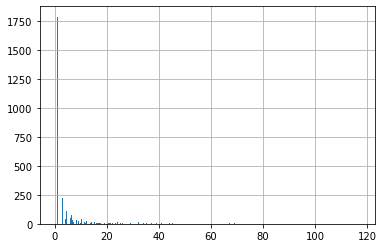

In [55]:
df_filtered["diff_pred"].hist(bins=1000)

In [56]:
count_df = df_filtered.groupby('sequence')['sequence'].count()


In [57]:
filtered_count = count_df[count_df > 6]

In [58]:
filtered_count = filtered_count.index.tolist()

In [59]:
filtered_count = set(filtered_count)

In [60]:
final_df = df_filtered[df_filtered['sequence'].isin(filtered_count)]


In [61]:
final_df["coord_plus_seq"] = np.NaN
final_df["coord_plus_seq"] = final_df.apply(lambda x: x.fish_head + (int(x.sequence),) + ((x.tail_points),), axis = 1)


In [62]:
final_df = final_df[['length_of_fish', 'center_of_mass', 'fish_tail',
       'fish_head', 'quadrant', 'fish_area', 'fish_id', 'tail_points', 
       'quad_coord', 'sequence']]



In [63]:
final_df.to_csv('C:/Users/marcio/Documents/fish_analyzer_rotated' + '.csv', mode='w', index=True, header=True)


In [66]:
pd.set_option('display.max_rows', 1000000)

final_df.loc[final_df["quadrant"] == 0]


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,sequence
frame_number,,,,,,,,,,
1292,21.840330,"(137, 664)","(183, 653)","(116, 670)",0,614.0,1,"[(669, 121), (670, 136), (661, 149), (656, 166...","(0, 430, 414, 440)",5
1293,21.840330,"(137, 664)","(183, 653)","(116, 670)",0,611.0,1,"[(669, 121), (670, 136), (661, 149), (656, 166...","(0, 430, 414, 440)",5
1294,21.189620,"(137, 664)","(183, 653)","(117, 671)",0,621.5,1,"[(668, 129), (673, 139), (660, 153), (656, 168...","(0, 430, 414, 440)",5
1295,22.135944,"(138, 664)","(184, 654)","(117, 671)",0,618.5,1,"[(668, 128), (663, 142), (659, 156), (656, 170...","(0, 430, 414, 440)",5
1296,20.880613,"(137, 665)","(183, 654)","(117, 671)",0,604.5,1,"[(668, 127), (663, 141), (660, 155), (656, 169...","(0, 430, 414, 440)",5
1297,20.880613,"(137, 665)","(183, 654)","(117, 671)",0,604.5,1,"[(668, 127), (663, 141), (660, 155), (656, 169...","(0, 430, 414, 440)",5
1298,21.189620,"(137, 664)","(183, 654)","(117, 671)",0,610.0,1,"[(668, 131), (658, 138), (660, 153), (656, 168...","(0, 430, 414, 440)",5
1309,21.840330,"(139, 664)","(185, 653)","(118, 670)",0,618.5,1,"[(667, 132), (663, 140), (659, 155), (656, 170...","(0, 430, 414, 440)",8
1310,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,617.5,1,"[(667, 128), (663, 142), (659, 156), (656, 170...","(0, 430, 414, 440)",8
